<a href="https://colab.research.google.com/github/zhuoyingcai/NYC-Housing-Prices-Analysis/blob/master/NYC_Housing_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Section

In [106]:
import os
import requests

# Data
import numpy as np
import pandas as pd

from scipy import stats

# Plot
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
!pip install geopandas
import geopandas as gpd

import json

# Path Functions

In [0]:
def ensure_dir(path_to_dir):
  try:
      os.makedirs(path_to_dir)
  except FileExistsError:
      # directory already exists
      pass

# Config

In [108]:
# path config
annualizedSalesUpdate_data_dir = '/content/drive/My Drive/Colab Notebooks/dataScience/annualizedSalesUpdate'
data_dir = '/content/drive/My Drive/Colab Notebooks/dataScience/data'

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# make sure dir exist
ensure_dir(data_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Load and summarize data

In [0]:
# define dataframe
df = pd.DataFrame()

In [0]:
years = [2017, 2018]
boroughs = ['bronx', 'brooklyn', 'manhattan', 'queens', 'statenisland']

# load data
for year in years:
  for borough in boroughs:
    path = annualizedSalesUpdate_data_dir + '/%s_%s.xls' % (year, borough)
    data = pd.read_excel(path, header=4)
    df = df.append(data, sort=False)

We first visually inspect the data to see if there is any missing data or incorrect data types. Also, we may want to edit data entry.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170407 entries, 0 to 8385
Data columns (total 21 columns):
BOROUGH                           170407 non-null int64
NEIGHBORHOOD                      170407 non-null object
BUILDING CLASS CATEGORY           170407 non-null object
TAX CLASS AT PRESENT              170349 non-null object
BLOCK                             170407 non-null int64
LOT                               170407 non-null int64
EASE-MENT                         88660 non-null object
BUILDING CLASS AT PRESENT         170349 non-null object
ADDRESS                           170407 non-null object
APARTMENT NUMBER                  106536 non-null object
ZIP CODE                          170393 non-null float64
RESIDENTIAL UNITS                 170349 non-null float64
COMMERCIAL UNITS                  170349 non-null float64
TOTAL UNITS                       170349 non-null float64
LAND SQUARE FEET                  170346 non-null float64
GROSS SQUARE FEET                 1

In [112]:
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,25,,A5,412 EAST 179 STREET,,...,1.0,0.0,1.0,1842.0,2048.0,1901.0,1,A5,0,2017-04-04
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,55,,A5,410 EAST 182ND STREET,,...,1.0,0.0,1.0,1330.0,1460.0,1899.0,1,A5,305000,2017-07-18
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,56,,A1,412 EAST 182 STREET,,...,1.0,0.0,1.0,1306.0,1440.0,1899.0,1,A1,178000,2017-01-19
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,56,,A1,412 EAST 182 STREET,,...,1.0,0.0,1.0,1306.0,1440.0,1899.0,1,A1,449000,2017-07-14
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,,A1,4455 PARK AVENUE,,...,1.0,0.0,1.0,1622.0,1587.0,1899.0,1,A1,140000,2017-05-12
5,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,,A1,4445 PARK AVENUE,,...,1.0,0.0,1.0,1694.0,1497.0,1899.0,1,A1,246000,2017-11-06
6,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3036,13,,A1,4348 PARK AVENUE,,...,1.0,0.0,1.0,3525.0,1764.0,1899.0,1,A1,420000,2017-02-03
7,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3037,42,,A1,4428 PARK AVENUE,,...,1.0,0.0,1.0,3525.0,1340.0,1899.0,1,A1,380250,2017-09-29
8,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3037,101,,S0,443 EAST 180 STREET,,...,1.0,2.0,3.0,1293.0,2820.0,1952.0,1,S0,325000,2017-11-13
9,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3043,55,,A1,1948 BATHGATE AVENUE,,...,1.0,0.0,1.0,2356.0,2047.0,1901.0,1,A1,127000,2017-08-22


In [113]:
df.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
8381,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7094,61,NaN,V0,23 WILTSHIRE LANE,NaN,...,0.0,0.0,0.0,4427.0,0.0,2018.0,1,V0,793216,2018-05-25
8382,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7267,289,NaN,A5,41 JADE COURT,NaN,...,1.0,0.0,1.0,2955.0,2612.0,2018.0,1,V0,671026,2018-10-04
8383,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7267,298,NaN,A5,11 JADE COURT,NaN,...,1.0,0.0,1.0,4108.0,2612.0,2018.0,1,V0,610950,2018-07-23
8384,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7267,299,NaN,A5,9 JADE COURT,NaN,...,1.0,0.0,1.0,11019.0,2612.0,2018.0,1,V0,672043,2018-08-07
8385,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7346,1,NaN,V0,GAYNOR STREET,NaN,...,0.0,0.0,0.0,42016.0,0.0,0.0,1,V0,0,2018-09-21


# 2. Data Cleaning

---

We found two problems:

 1. we see that the dataframe has 170407 entries, but TAX CLASS AT PRESENT, EASE-MENT, BUILDING CLASS AT PRESENT, APARTMENT NUMBER, ZIP CODE, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET and YEAR BUILT has less entries.
 
 2. The BROUGH is represented as numerical values rather than categorical.
 
 3. There are some data does not make sense, such as ZIP CODE, GROSS SQUARE FEET, YEAR BUILT and SALE PRICE can not be 0.


---


 What we are going to do next:
 
 1. rename BOROUGH values to actual borough name.
 
 2. drop columns that we are not going to use.
 
 3. remove raws with null or 0  ZIP CODE, SALE PRICE, GROSS SQUARE FEET, LAND SQUARE FEET and YEAR BUILT.
 
 4. standard data clean process to clean duplicate raws,  raws with Nah value.

---



In [0]:
df['BOROUGH'] = df['BOROUGH'].replace({1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'})

In [0]:
df = df.drop(['BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
         'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE' ], axis=1)

In [0]:
df = df[df['SALE PRICE'] != 0]
df = df[df['GROSS SQUARE FEET'] != 0]
df = df[df['LAND SQUARE FEET'] != 0]
df = df[df['YEAR BUILT'] != 0]
df = df[df['ZIP CODE'] != 0]

In [0]:
df = df.drop_duplicates(keep='last')
df = df.dropna()

In [118]:
df = df.astype({"ZIP CODE": int})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64142 entries, 1 to 8384
Data columns (total 14 columns):
BOROUGH                      64142 non-null object
NEIGHBORHOOD                 64142 non-null object
BLOCK                        64142 non-null int64
LOT                          64142 non-null int64
ZIP CODE                     64142 non-null int64
RESIDENTIAL UNITS            64142 non-null float64
COMMERCIAL UNITS             64142 non-null float64
TOTAL UNITS                  64142 non-null float64
LAND SQUARE FEET             64142 non-null float64
GROSS SQUARE FEET            64142 non-null float64
YEAR BUILT                   64142 non-null float64
TAX CLASS AT TIME OF SALE    64142 non-null int64
SALE PRICE                   64142 non-null int64
SALE DATE                    64142 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(5), object(2)
memory usage: 7.3+ MB


## 2.1 Outlier
We also want to look at the distribution of our SALE PRICE.

1. We noticed that there are some extremely expensive house located in Manhattan, we would like to look at it and decide whether include them in our project or not.

2. The documentation of this data set explained there will be $0 sales price which means that there was a transfer of ownership without a cash consideration. However, there are some other values indicate there was a transfer of ownership which is not in the consideration of our project.

In [119]:
df['SALE PRICE'].value_counts(dropna=False).head(10)

10        1267
600000     643
550000     610
650000     608
700000     591
800000     568
450000     561
750000     540
400000     535
500000     528
Name: SALE PRICE, dtype: int64

In [120]:
df.nlargest(10, 'SALE PRICE')

,BOROUGH,NEIGHBORHOOD,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
773,Manhattan,CHELSEA,713,1,10011,0.0,167.0,167.0,165200.0,1100533.0,1905.0,4,2397501899,2018-03-20
7347,Manhattan,MIDTOWN CBD,1301,1,10167,0.0,35.0,35.0,81336.0,1586886.0,1966.0,4,2210000000,2017-05-05
2572,Manhattan,FINANCIAL,40,3,10005,0.0,1.0,1.0,53632.0,1617206.0,1987.0,4,1040000000,2017-01-24
14970,Manhattan,UPPER WEST SIDE (59-79),1119,61,10023,0.0,1.0,1.0,15059.0,99769.0,1978.0,4,980000000,2018-06-15
771,Manhattan,CHELSEA,673,1,10001,0.0,42.0,42.0,136000.0,1129200.0,1912.0,4,880000000,2018-10-23
20902,Brooklyn,SPRING CREEK,4435,1,11239,1092.0,0.0,1092.0,358496.0,997720.0,1971.0,2,869612895,2018-05-04
1755,Manhattan,FASHION,840,42,10018,0.0,4.0,4.0,51271.0,697029.0,1920.0,4,850000000,2019-02-08
8602,Manhattan,MIDTOWN WEST,1000,1,10036,0.0,4.0,4.0,16066.0,369864.0,1909.0,4,719099999,2018-04-27
6795,Manhattan,MIDTOWN CBD,1298,23,10017,0.0,42.0,42.0,35145.0,627691.0,1987.0,4,701000000,2018-10-30
2570,Manhattan,FINANCIAL,29,1,10004,0.0,1.0,1.0,42762.0,993569.0,1983.0,4,652000000,2017-05-24


In [121]:
lst = df['SALE PRICE'].unique().tolist()
lst = np.sort(lst, axis = None)
lst[:100]

array([    1,     2,     3,     4,     5,     6,    10,    15,    20,
          60,   100,   125,   200,   210,   396,   416,   500,   700,
         825,  1000,  1006,  1041,  1162,  1500,  1787,  1800,  1895,
        2000,  2352,  2416,  2500,  2567,  3000,  3317,  3500,  3582,
        3750,  3774,  3900,  3937,  4000,  4500,  4700,  4800,  4900,
        4997,  5000,  5041,  5100,  5200,  5300,  5500,  5700,  5750,
        6000,  6081,  6250,  6270,  6300,  6400,  6438,  6500,  6533,
        6562,  6650,  7000,  7500,  7923,  7980,  8000,  8250,  8500,
        9500,  9686,  9828, 10000, 10001, 10050, 10500, 11000, 11500,
       11666, 12000, 12497, 12500, 12678, 12950, 13333, 13864, 13870,
       14583, 14915, 15000, 15238, 15387, 15523, 15567, 16000, 16500,
       16544])

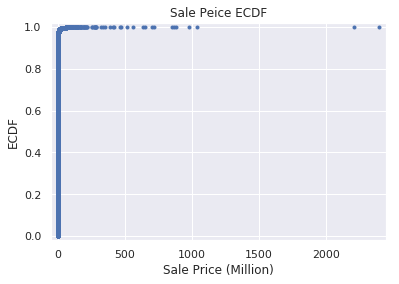

In [122]:
x = np.sort(df['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.title('Sale Peice ECDF')
_ = plt.xlabel('Sale Price (Million)')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

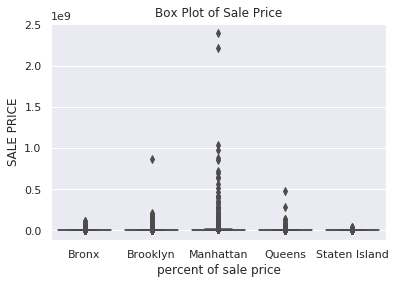

In [123]:
_ = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
_ = plt.title('Box Plot of Sale Price')
_ = plt.xlabel('Boroughs')
_ = plt.xlabel('percent of sale price')
plt.show()

## 2.2 Cut Unreal Price

From the above data, we conclude that:

1. We think the price of the most expensive buildings is reasonable. The average price for each units is not unacceptable. Hoever, We decided not to keep those data because those value is extremly large and way too far from the mean. We will set a maximum price range for the data.

2. There are a lot of extremely low sale price which indicates that there was a transfer of ownership. In order to solve this problem, we decided to set a minimum price range for the data.

---

We set price range from ten thousands up to three millions. Houses in this price is what we can accept and would like to purchase it.

In [0]:
# set max price to be 10000000
df = df[(df['SALE PRICE'] < 3000000)]
# set min price to be 50000
df = df[(df['SALE PRICE'] > 100000)]

# 3. Data Visualization

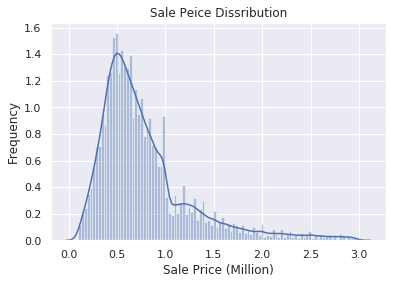

In [125]:
sns.set()
_ = sns.distplot(df['SALE PRICE']/1000000, bins=100)
plt.title('Sale Peice Dissribution')
plt.xlabel('Sale Price (Million)')
plt.ylabel('Frequency')
plt.show()

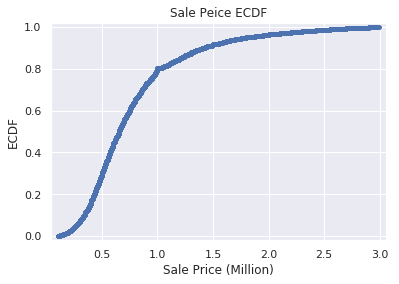

In [126]:
# make Empirical cumulative distribution function (ECDF)
x = np.sort(df['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.title('Sale Peice ECDF')
_ = plt.xlabel('Sale Price (Million)')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

From above graph, we notice that most of the houses were trading between 0.5 million to 1 moillion. In addition, there is a peak in 1 million which mean house with sale price of 1 million is also very popular.

---

As we know, the hoursing price are has a huge different in different borough. We plot the two more graph in order to see the how the horsing price realted to borough. We can conclude that:

1. Most of the housing prices are below one milion. 

2. The housing price in Manhattan is the most diverse. However, The Bronx and Staten Island rarely have housing prices for over one milion.

3. Ordering by turnover rate, Manhattan >> Brooklyn > Queen > Bronx > Staten Island.

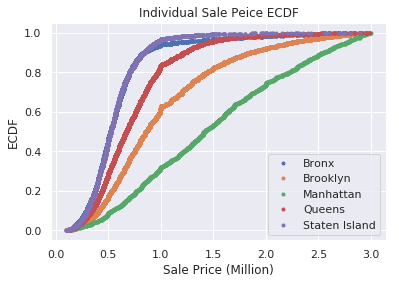

In [127]:
# gets borough list
boroughs = df['BOROUGH'].unique().tolist()
df_index = df.set_index('BOROUGH', drop=False)

# draw ECDFs
for borough in boroughs:
  x = np.sort(df_index.loc[borough]['SALE PRICE']/1000000)
  y = np.arange(1, len(x)+1) / len(x)
  _ = plt.plot(x, y, marker='.', linestyle='none')

plt.legend(boroughs)
_ = plt.title('Individual Sale Peice ECDF')
_ = plt.xlabel('Sale Price (Million)')
_ = plt.ylabel('ECDF')
plt.show()

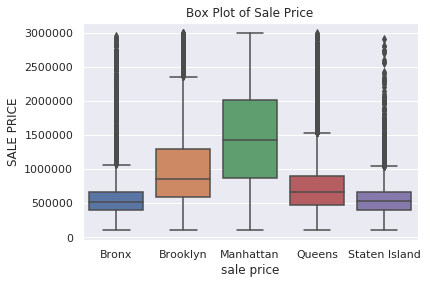

In [128]:
# shows the average price in each boroughs
_ = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
_ = plt.title('Box Plot of Sale Price')
_ = plt.xlabel('Boroughs')
_ = plt.xlabel('sale price')
plt.show()

# How were the hoursing prices chaged among the five boroughs over the past two years?

---

Formula for Z score = (Observation — Mean)/Standard Deviation

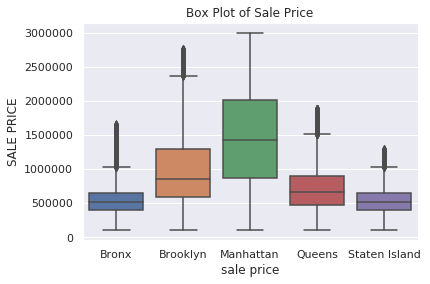

In [129]:
# separate data by borough
df_Bronx = df_index.loc['Bronx']
df_Brooklyn = df_index.loc['Brooklyn']
df_Manhattan = df_index.loc['Manhattan']
df_Queens = df_index.loc['Queens']
df_StatenIsland = df_index.loc['Staten Island']

# compute z score of each borough
z_Bronx = np.abs(stats.zscore(df_Bronx['SALE PRICE']))
z_Brooklyn = np.abs(stats.zscore(df_Brooklyn['SALE PRICE']))
z_Manhattan = np.abs(stats.zscore(df_Manhattan['SALE PRICE']))
z_Queens = np.abs(stats.zscore(df_Queens['SALE PRICE']))
z_StatenIsland = np.abs(stats.zscore(df_StatenIsland['SALE PRICE']))

# remove outliers
threshold = 3

df_Bronx = df_Bronx[(z_Bronx < threshold)]
df_Brooklyn = df_Brooklyn[(z_Brooklyn < threshold)]
df_Manhattan = df_Manhattan[(z_Manhattan < threshold)]
df_Queens = df_Queens[(z_Queens < threshold)]
df_StatenIsland = df_StatenIsland[(z_StatenIsland < threshold)]

# box plot
df_no_outlier = pd.DataFrame()

df_no_outlier = df_no_outlier.append(df_Bronx, sort=False)
df_no_outlier = df_no_outlier.append(df_Brooklyn, sort=False)
df_no_outlier = df_no_outlier.append(df_Manhattan, sort=False)
df_no_outlier = df_no_outlier.append(df_Queens, sort=False)
df_no_outlier = df_no_outlier.append(df_StatenIsland, sort=False)

_ = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df_no_outlier)
_ = plt.title('Box Plot of Sale Price')
_ = plt.xlabel('Boroughs')
_ = plt.xlabel('sale price')
plt.show()

In [0]:
def download_json():
    '''Downloads GEOJSON from Open Data NYC'''
#     url = "http://data.beta.nyc//dataset/472dda10-79b3-4bfb-9c75-e7bd5332ec0b/resource/d826bbc6-a376-4642-8d8b-3a700d701557/download/88472a1f6fd94fef97b8c06335db60f7nyccommunitydistricts.geojson"
#     url = "http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nycd/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson"
    url = "http://data.beta.nyc//dataset/3bf5fb73-edb5-4b05-bb29-7c95f4a727fc/resource/6df127b1-6d04-4bb7-b983-07402a2c3f90/download/f4129d9aa6dd4281bc98d0f701629b76nyczipcodetabulationareas.geojson"
    resp = requests.get(url)
    return resp.json()

def gen_base(geojson):
    '''Generates baselayer of NYC GEO map'''
    base = alt.Chart(alt.Data(values=geojson)).mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
    ).properties(
        width=500,
        height=500
    )
    return base

anc_json = download_json()
base_layer = gen_base(geojson=anc_json)

In [131]:
gdf = gpd.GeoDataFrame.from_features((anc_json))
gdf = gdf.astype({"postalCode": int})
gdf.info()
# gdf.loc[gdf.postalCode==10047]
# np.sort(gdf.postalCode, axis = None)
# gdf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 12 columns):
@id           262 non-null object
BLDGpostal    262 non-null int64
CTY_FIPS      262 non-null object
OBJECTID      262 non-null int64
PO_NAME       262 non-null object
STATE         262 non-null object
ST_FIPS       262 non-null object
borough       262 non-null object
geometry      262 non-null object
latitude      262 non-null float64
longitude     262 non-null float64
postalCode    262 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 24.6+ KB


In [0]:
# ZIP Code Definitions of New York City Neighborhoods
# Bronx 
Central_Bronx = [10453, 10457, 10460]
Bronx_Park_Fordham = [10458, 10467, 10468]
High_Bridge_Morrisania = [10451, 10452, 10456]
Hunts_Point_Mott_Haven = [10454, 10455, 10459, 10474]
Kingsbridge_Riverdale = [10463, 10471]
Northeast_Bronx = [10466, 10469, 10470, 10475]
Southeast_Bronx = [10461, 10462,10464, 10465, 10472, 10473]

# Brooklyn
Central_Brooklyn = [11212, 11213, 11216, 11233, 11238]
Southwest_Brooklyn = [11209, 11214, 11228]
Borough_Park = [11204, 11218, 11219, 11230]
Canarsie_Flatlands = [11234, 11236, 11239]
Southern_Brooklyn = [11223, 11224, 11229, 11235]
Northwest_Brooklyn = [11201, 11205, 11215, 11217, 11231]
Flatbush = [11203, 11210, 11225, 11226]
EastNY_New_Lots = [11207, 11208]
Greenpoint = [11211, 11222]
Sunset_Park = [11220, 11232]
Bushwick_Williamsburg = [11206, 11221, 11237]

# Manhattan
Central_Harlem = [10026, 10027, 10030, 10037, 10039]
Chelsea_Clinton =	[10001, 10011, 10018, 10019, 10020, 10036]
East_Harlem	= [10029, 10035]
Gramercy_Park_Murray_Hill =	[10010, 10016, 10017, 10022]
Greenwich_Village_Soho = [10012, 10013, 10014]
Lower_Manhattan =	[10004, 10005, 10006, 10007, 10038, 10280]
Lower_East = [10002, 10003, 10009]
Upper_East = [10021, 10028, 10044, 10065, 10075, 10128]
Upper_West = [10023, 10024, 10025]
Inwood_Washington_Heights =	[10031, 10032, 10033, 10034, 10040]

# Queens
Northeast_Queens = [11361, 11362, 11363, 11364]
North_Queens = [11354, 11355, 11356, 11357, 11358, 11359, 11360]
Central_Queens = [11365, 11366, 11367]
Jamaica	= [11412, 11423, 11432, 11433, 11434, 11435, 11436]
Northwest_Queens = [11101, 11102, 11103, 11104, 11105, 11106]
West_Central_Queens = [11374, 11375, 11379, 11385]
Rockaways = [11691, 11692, 11693, 11694, 11695, 11697]
Southeast_Queens = [11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429]
Southwest_Queens = [11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421]
West_Queens = [11368, 11369, 11370, 11372, 11373, 11377, 11378]

# Staten Island
Port_Richmond =	[10302, 10303, 10310]
South_Shore = [10306, 10307, 10308, 10309, 10312]
Stapleton_StGeorge = [10301, 10304, 10305]
Mid_Island = [10314]

In [0]:
# Bronx
BX1 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Central_Bronx)]
BX2 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Bronx_Park_Fordham)]
BX3 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(High_Bridge_Morrisania)]
BX4 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Hunts_Point_Mott_Haven)]
BX5 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Kingsbridge_Riverdale)]
BX6 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Northeast_Bronx)]
BX7 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Southeast_Bronx)]

# Brooklyn
BK1 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Central_Brooklyn)]
BK2 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Southwest_Brooklyn)]
BK3 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Borough_Park)]
BK4 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Canarsie_Flatlands)]
BK5 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Southern_Brooklyn)]
BK6 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Northwest_Brooklyn)]
BK7 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Flatbush)]
BK8 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(EastNY_New_Lots)]
BK9 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Greenpoint)]
BK10 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Sunset_Park)]
BK11 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Bushwick_Williamsburg)]

# Manhattan
MN1 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Central_Harlem)]
MN2 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Chelsea_Clinton)]
MN3 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(East_Harlem)]
MN4 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Gramercy_Park_Murray_Hill)]
MN5 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Greenwich_Village_Soho)]
MN6 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Lower_Manhattan)]
MN7 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Lower_East)]
MN8 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Upper_East)]
MN9 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Upper_West)]
MN10 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Inwood_Washington_Heights)]

# Queens
QU1 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Northeast_Queens)]
QU2 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(North_Queens)]
QU3 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Central_Queens)]
QU4 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Jamaica)]
QU5 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Northwest_Queens)]
QU6 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(West_Central_Queens)]
QU7 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Rockaways)]
QU8 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Southeast_Queens)]
QU9 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Southwest_Queens)]
QU10 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(West_Queens)]

# Staten Island
SI1 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Port_Richmond)]
SI2 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(South_Shore)]
SI3 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Stapleton_StGeorge)]
SI4 = df_no_outlier.loc[df_no_outlier['ZIP CODE'].isin(Mid_Island)]

In [0]:
turn_over_rate = []
for zip_code in gdf.postalCode:
# Bronx
  if zip_code in Central_Bronx:
    turn_over_rate.append(len(BX1))
  elif zip_code in Bronx_Park_Fordham:
    turn_over_rate.append(len(BX2))
  elif zip_code in High_Bridge_Morrisania:
    turn_over_rate.append(len(BX3))
  elif zip_code in Hunts_Point_Mott_Haven: 
    turn_over_rate.append(len(BX4))
  elif zip_code in Kingsbridge_Riverdale:
    turn_over_rate.append(len(BX5))
  elif zip_code in Northeast_Bronx:
    turn_over_rate.append(len(BX6))
  elif zip_code in Southeast_Bronx:
    turn_over_rate.append(len(BX7))
# Brooklyn
  elif zip_code in Central_Brooklyn:
    turn_over_rate.append(len(BK1))
  elif zip_code in Southwest_Brooklyn:
    turn_over_rate.append(len(BK2))
  elif zip_code in Borough_Park:
    turn_over_rate.append(len(BK3))
  elif zip_code in Canarsie_Flatlands:
    turn_over_rate.append(len(BK4))
  elif zip_code in Southern_Brooklyn:
    turn_over_rate.append(len(BK5))
  elif zip_code in Northwest_Brooklyn:
    turn_over_rate.append(len(BK6))
  elif zip_code in Flatbush:
    turn_over_rate.append(len(BK7))
  elif zip_code in EastNY_New_Lots:
    turn_over_rate.append(len(BK8))
  elif zip_code in Greenpoint:
    turn_over_rate.append(len(BK9))
  elif zip_code in Sunset_Park:
    turn_over_rate.append(len(BK10))
  elif zip_code in Bushwick_Williamsburg:
    turn_over_rate.append(len(BK11))
# Manhattan
  elif zip_code in Central_Harlem:
    turn_over_rate.append(len(MN1))
  elif zip_code in Chelsea_Clinton:
    turn_over_rate.append(len(MN2))
  elif zip_code in East_Harlem:
    turn_over_rate.append(len(MN3))
  elif zip_code in Gramercy_Park_Murray_Hill:
    turn_over_rate.append(len(MN4))
  elif zip_code in Greenwich_Village_Soho:
    turn_over_rate.append(len(MN5))
  elif zip_code in Lower_Manhattan:
    turn_over_rate.append(len(MN6))
  elif zip_code in Lower_East:
    turn_over_rate.append(len(MN7))
  elif zip_code in Upper_East:
    turn_over_rate.append(len(MN8))
  elif zip_code in Upper_West:
    turn_over_rate.append(len(MN9))
  elif zip_code in Inwood_Washington_Heights:
    turn_over_rate.append(len(MN10))
# Queens
  elif zip_code in Northeast_Queens:
    turn_over_rate.append(len(QU1))
  elif zip_code in North_Queens:
    turn_over_rate.append(len(QU2))
  elif zip_code in Central_Queens:
    turn_over_rate.append(len(QU3))
  elif zip_code in Jamaica:
    turn_over_rate.append(len(QU4))
  elif zip_code in Northwest_Queens:
    turn_over_rate.append(len(QU5))
  elif zip_code in West_Central_Queens:
    turn_over_rate.append(len(QU6))
  elif zip_code in Rockaways:
    turn_over_rate.append(len(QU7))
  elif zip_code in Southeast_Queens:
    turn_over_rate.append(len(QU8))
  elif zip_code in Southwest_Queens:
    turn_over_rate.append(len(QU9))
  elif zip_code in West_Queens:
    turn_over_rate.append(len(QU10))
# Staten Island
  elif zip_code in Port_Richmond:
    turn_over_rate.append(len(SI1))
  elif zip_code in South_Shore:
    turn_over_rate.append(len(SI2))
  elif zip_code in Stapleton_StGeorge:
    turn_over_rate.append(len(SI3))
  elif zip_code in Mid_Island:
    turn_over_rate.append(len(SI4))
  else:
    turn_over_rate.append(0)

In [143]:
gdf['Turnover Rate'] = turn_over_rate

choro_json = json.loads(gdf.to_json())
choro_data = alt.Data(values=choro_json['features'])

OverflowError: ignored

In [0]:
# Interactive Zip Code map
base = alt.Chart(choro_data, title = 'NYC Housing Turn Over Rate').mark_geoshape(
    stroke='black',
    strokeWidth=0.5
).encode(
    longitude='properties.longitude:Q',
    latitude='properties.latitude:Q',
).properties(
    width=900,
    height=900
)

choro = alt.Chart(choro_data).mark_geoshape(
    fill='lightgray',
    stroke='black'
).encode(
    alt.Color('properties.Turnover Rate', 
              type='quantitative', 
              scale=alt.Scale(scheme='YellowOrangeBrown'),
              title = "Turn Over Rate")
)

hover = alt.selection(type='single', on='mouseover', nearest=True,
                      fields=['properties.latitude', 'properties.longitude'])


text = base.mark_text(dy=-5, align='right').encode(
    alt.Text('properties.postalCode', type='nominal'),
    opacity=alt.condition(~hover, alt.value(0), alt.value(1))
)

points = base.mark_point().encode(
    color=alt.value('black'),
    size=alt.condition(~hover, alt.value(0), alt.value(1))
).add_selection(hover)

base + choro + points + text